# Customer Segmentation using K-Means Clustering
This notebook
- walks through the analysis to divide customers into groups/segments using K-Means clustering. K-means clustering is an unsupervised classification method that clusters data by trying to separate samples in n groups of equal variance.
- performs K-means clustering after 
  * classifying products into `aisle`, `deparment` and `organic` categories (`0_DataPrep.ipynb`)
  * Principal Component Analysis (PCA) was performed and reduced to 71 principal components. Number of components was chosen such that 95% of variance is retained. (`1_PCA.ipynb`)
- determines number of clusters by reviewing metrics including inertia, Silhouette coefficient and Calinski-Harabaz score

## Import Depdendencies and Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pickle

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
cust_train_reduced = pd.read_csv('../Outputs/customer_order_train_reduced.csv')
cust_train_reduced.drop(cust_train_reduced.columns[0], axis=1, inplace=True)

print(f'There are {cust_train_reduced.shape[0]:,} customers in training data set and {cust_train_reduced.shape[1]:,} dimensions')
cust_train_reduced.head(5)

There are 20,168 customers in training data set and 71 dimensions


,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,-5.910101,-1.817756,-3.132463,-0.107840,2.262797,-1.085222,-0.343117,1.695994,0.221188,-0.033039,...,-0.272325,0.211194,0.998564,0.661929,-0.246326,-0.339113,0.429339,0.863432,-0.747858,-0.352087
1,-6.179444,-2.108571,-3.644230,0.078246,4.048101,-1.165402,1.540327,-0.342280,-0.159625,-0.925080,...,0.326506,0.172667,-1.231313,-0.543753,0.244803,0.049766,-0.890263,1.930898,0.833700,1.178497
2,175.175162,-2.025396,-0.748486,1.191982,5.387377,3.564970,-5.178943,-5.159448,-2.580185,0.534896,...,1.137074,-0.716124,1.016299,3.055268,-0.415043,-0.712064,1.742104,0.337453,0.706408,6.483967
3,-5.815371,0.090122,-1.756488,-0.347117,-2.340362,-8.403755,4.236185,0.557626,-1.000335,-1.694324,...,-1.059698,1.697802,0.728849,-0.816363,0.541905,0.731675,0.402328,-0.866669,0.615065,-0.552924
4,-6.094946,-1.132857,-2.957879,0.130307,2.361835,-3.727978,1.167230,-3.244399,-0.304043,-0.437521,...,-0.171043,-0.366000,-0.145396,0.473588,0.183927,-0.220939,0.381579,-0.700740,0.339453,0.065392


In [3]:
# convert to np array for Kmeans
cust_train_reduced = cust_train_reduced.values

## K-Means Clustering Iterations
- Visually determine the appropriate amount of clusters to be used based on inertia, silhouette coefficient and calinkski-harabasz score

In [4]:
# Compute K-Means for 2 to n clusters
# Return inertia, silhouette coefficient, and calinkski-harabasz score
def kmeans_metrics(data, n_clusters):
    # create arrays to hold results
    inertia = []
    silhouette_coeff = []
    c_h_score = []
    
    # Run for 2 to n clusters
    for i in range(2, n_clusters+1):
        print(f'Number of cluster = {i}')
        
        # K-Means Model
        model = KMeans(n_clusters=i, init='k-means++',random_state=42).fit(data)
        
        # Calculate Metrics
        inertia.append(model.inertia_)
        silhouette_coeff.append(silhouette_score(data, model.labels_))
        c_h_score.append(calinski_harabasz_score(data, model.labels_))
    
    return inertia, silhouette_coeff, c_h_score

In [5]:
# testing at most 20 clusters
clusters = 20

inertias, silhouette_coeffs, calinski_harabasz_scores = kmeans_metrics(cust_train_reduced, clusters)

Number of cluster = 2
Number of cluster = 3
Number of cluster = 4
Number of cluster = 5
Number of cluster = 6
Number of cluster = 7
Number of cluster = 8
Number of cluster = 9
Number of cluster = 10
Number of cluster = 11
Number of cluster = 12
Number of cluster = 13
Number of cluster = 14
Number of cluster = 15
Number of cluster = 16
Number of cluster = 17
Number of cluster = 18
Number of cluster = 19
Number of cluster = 20


In [6]:
# function to plot performance metrics by number of clusters
def kmeans_metrics_plot(n_cluster, inertias, silhouette_coeffs, calinski_harabasz_scores, save_png):
    sns.set()
    fig, ax1 = plt.subplots(figsize=(8,6))
    
    # x
    x = np.arange(2, n_cluster+1)
    
    # Inertia and Silhouette coefficient on primary y-axis
    ax1.set_title('Performance Scores vs. # of Clusters')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia (1e7) or Silhouette Coefficient')
    ax1.plot(x, inertias, 'bo-', label='Inertia')
    ax1.plot(x, silhouette_coeffs, 'ro-', label='Silhouette')
    
    # calinski-harabasz scores on secondary y-axis
    ax2 = ax1.twinx() # share x-axis
    ax2.set_ylabel('Calinski-Harabasz Score')
    ax2.plot(x, calinski_harabasz_scores, 'go-', label='Calinski-Harabasz')
    
    # legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    
    fig.tight_layout()
    # save figure
    plt.savefig(save_png)
    plt.show()
    

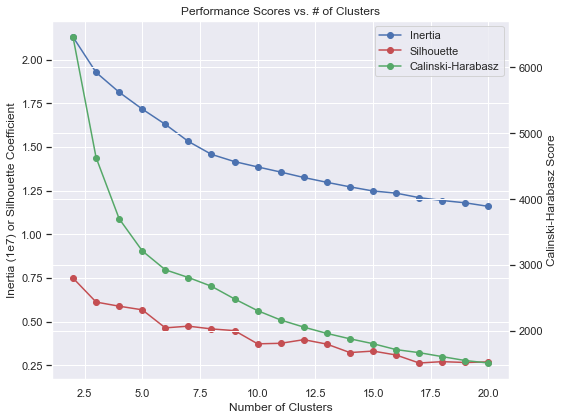

In [7]:
kmeans_metrics_plot(clusters, [x/1e7 for x in inertias], silhouette_coeffs, calinski_harabasz_scores, '../Outputs/Kmeans_cluster_scores.png')

#### Criteria
- **Inertia**: the smaller is better
- **Silhouette Coefficient**: a higher coefficient relates to a model with well-separated clusters. Range from -1 to 1
- **Calinski-Harabasz Score**: a higher score also means clusters are dense and well-separated.

Let's pick 4 clusters as balance of the 3 metrics

## K Means with 3 to 5 Clusters
1. Run K-Means
2. Explore purchase pattern by customer group

##### Run K-Means and check number of customers per cluster

In [13]:
def kmeans_build(data_train, n_cluster, data_predict):
    # build model
    model = KMeans(n_clusters=n_cluster, random_state=42).fit(data_train)
    
    # predict customer group
    cust_group = model.predict(data_predict)
    
    # print number of customers per cluster
    print('Cluster Group | Total Customer')
    print(pd.Series(cust_group).value_counts())
    
    # save model
    pickle.dump(kmeans_model, open(f'kmeans_{n_cluster}.sav', 'wb'))
    
    return cust_group

In [61]:
n_cluster = 4
customer_cluster = kmeans_build(cust_train_reduced, n_cluster, cust_train_reduced)

3    19087
1      759
0      240
2       82
dtype: int64


##### Explore purchase pattern by customer group
1. Load training dataset before PCA and scaling
2. Calculate average percent of purchase by product category per customer group
3. Visualize pattern in heat map

In [78]:
# function to plot purchase pattern heat map
# `order_history`: order history data (unscaled, non-dimension-reduction)
# `plot_threshold`: percent of purchase for a product category to not display in heat map (0.02 = 2%)
#                   [reduce number of categories to plot]
def customer_group_heatmap(order_history, plot_threshold=0.02):
    # 1) convert number of purchase to percent
    # aisle categories
    order_history.iloc[:,0:134] = order_history.iloc[:,0:134].div(order_history.Total, axis=0)
    # department categories
    order_history.iloc[:,135:156] = order_history.iloc[:,135:156].div(order_history.Total, axis=0)
    # organic product
    order_history.iloc[:,156] = order_history.iloc[:,156].div(order_history.Total, axis=0)
    #print('First 10 records')
    #print(order_history.head())
    
    # 2) average by customer group
    cg_order_history = order_history.groupby('customer type').mean()
    #print('-------')
    #print(cg_order_history)
    
    cg_aisle = cg_order_history.iloc[:,0:134]
    cg_dept = cg_order_history.iloc[:,135:157]
    cg_total = cg_order_history.iloc[:,[134]]
    
    #3) threshold for a product category to display in heatmap
    cg_aisle = cg_aisle.loc[:,(cg_aisle>plot_threshold).any()]
    cg_dept = cg_dept.loc[:,(cg_dept>plot_threshold).any()]
    
    #4) plot heat map
    fig = plt.figure(figsize=(10,12))
    gridspec.GridSpec(5,1)

    # Top map: Average percent of products by aisle bought by customer cluster
    plt.subplot2grid((9,1), (0,0), rowspan=4)
    plt.title('Percent of Items Purchased by Customer Type (Aisle)')
    sns.heatmap(cg_aisle.transpose(), cmap="Blues", linewidths=0.1)
    
    # Middle map: Average percent of products by department bought by customer cluster
    plt.subplot2grid((9,1), (4,0), colspan=1, rowspan=4)
    plt.title('Percent of Items Purchased by Customer Type (Department)')
    sns.heatmap(cg_dept.transpose(), cmap="Blues", linewidths=0.1)

    # Bottom map: Avearage number of products purchased
    plt.subplot2grid((9,1), (8,0))
    plt.title('Average # of Items Purchased by Customer Type')
    sns.heatmap(cg_total.transpose(), cmap="Reds", annot=True, fmt='0g', linewidths=0.2)

    plt.tight_layout()
    plt.show()

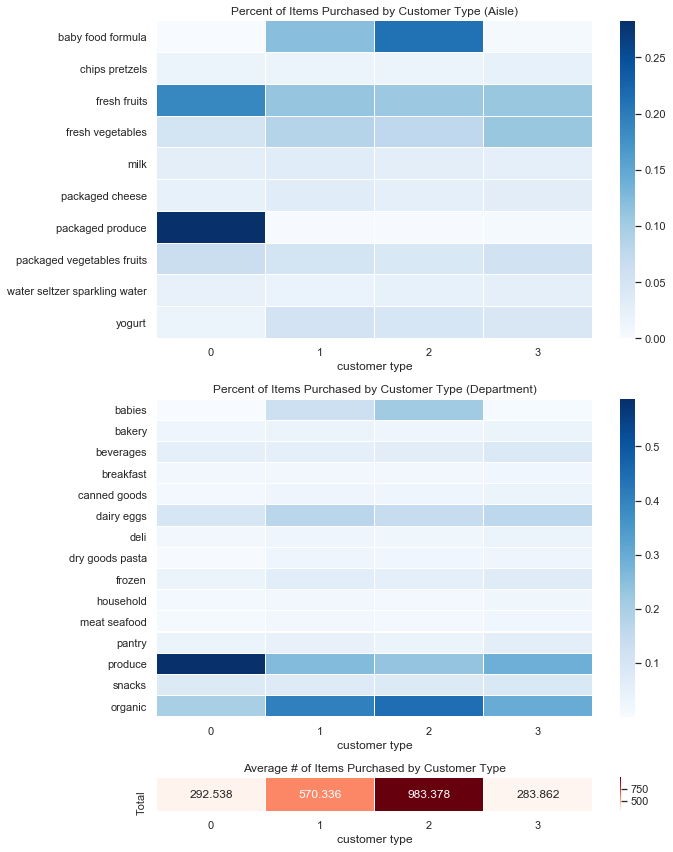

In [79]:
cust_train = pd.read_csv('../Outputs/customer_order_train.csv', index_col='user_id')
cust_train['customer type'] = customer_cluster
customer_group_heatmap(cust_train, 0.02)

### 3 clusters

0    19327
1      759
2       82
dtype: int64


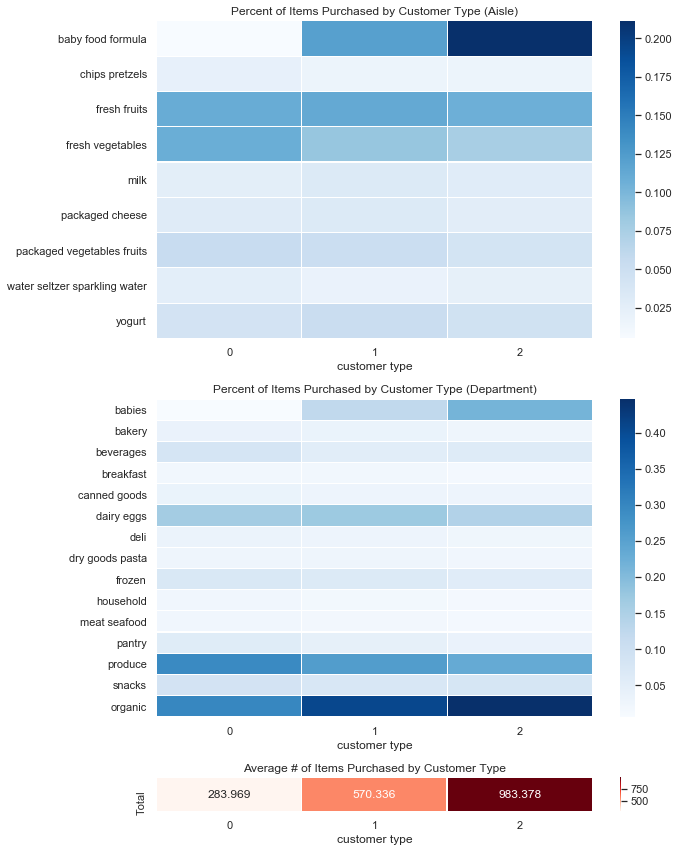

In [80]:
n_cluster = 3
customer_cluster = kmeans_build(cust_train_reduced, n_cluster, cust_train_reduced)
cust_train = pd.read_csv('../Outputs/customer_order_train.csv', index_col='user_id')
cust_train['customer type'] = customer_cluster
customer_group_heatmap(cust_train, 0.02)

### 5 clusters

0    18770
2      876
4      230
3      147
1      145
dtype: int64


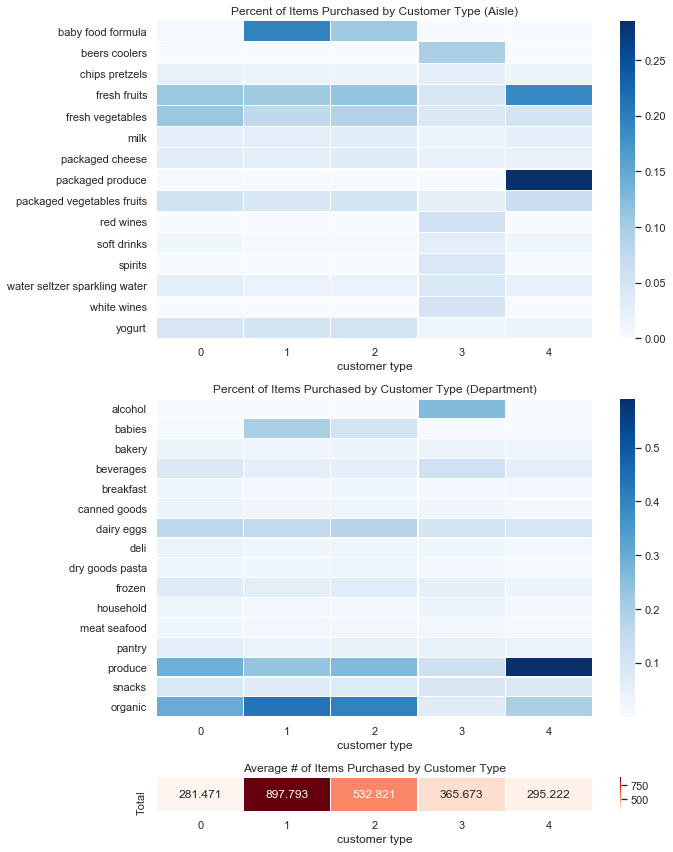

In [81]:
n_cluster = 5
customer_cluster = kmeans_build(cust_train_reduced, n_cluster, cust_train_reduced)
cust_train = pd.read_csv('../Outputs/customer_order_train.csv', index_col='user_id')
cust_train['customer type'] = customer_cluster
customer_group_heatmap(cust_train, 0.02)